In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df =pd.read_csv(r"C:\Users\Madhav\Downloads\ecommerce_furniture_dataset_2024.csv")
df.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [3]:
df= df.dropna()

In [4]:
df['tagText']= df['tagText'].astype('category').cat.codes

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 487 entries, 2 to 1983
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   487 non-null    object
 1   originalPrice  487 non-null    object
 2   price          487 non-null    object
 3   sold           487 non-null    int64 
 4   tagText        487 non-null    int8  
dtypes: int64(1), int8(1), object(3)
memory usage: 19.5+ KB
None


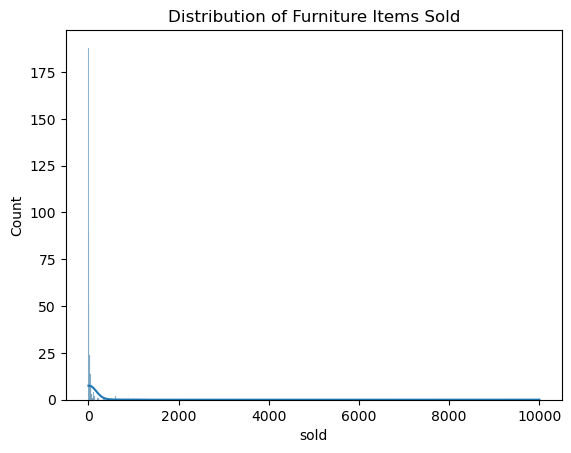

In [6]:
sns.histplot(df['sold'], kde=True)
plt.title("Distribution of Furniture Items Sold")
plt.show()

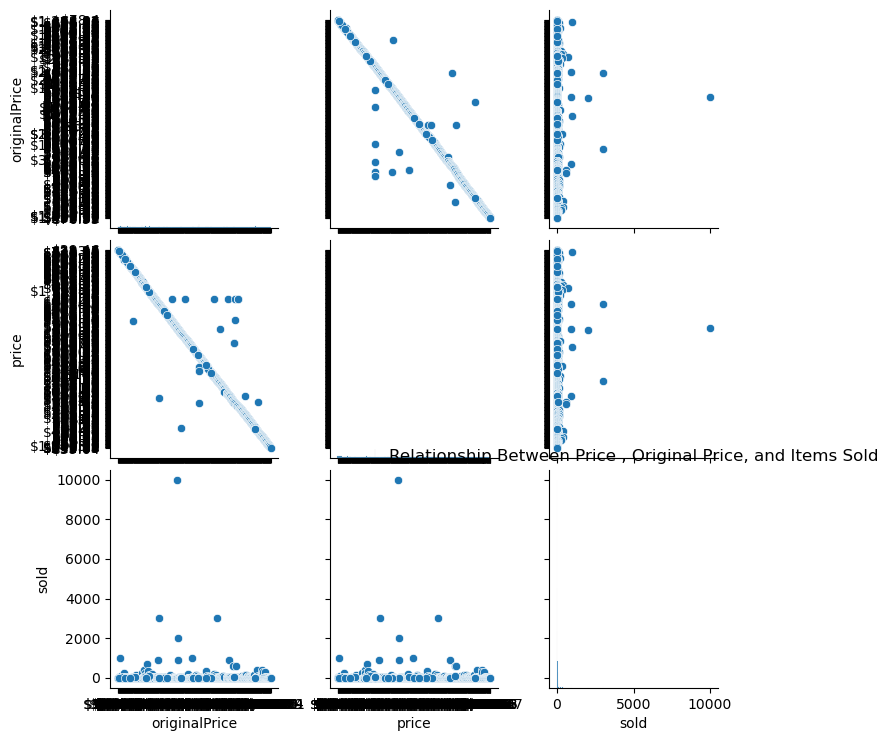

In [7]:
sns.pairplot(df,vars=['originalPrice', 'price','sold'],kind ='scatter')
plt.title('Relationship Between Price , Original Price, and Items Sold')
plt.show()

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
tfidf = TfidfVectorizer(max_features=100)
productTitle_tfidf = tfidf.fit_transform(df['productTitle'])
productTitle_tfidf_df =pd.DataFrame(productTitle_tfidf.toarray(), columns=tfidf.get_feature_names_out())
df = pd.concat([df, productTitle_tfidf_df], axis=1)
df= df.drop('productTitle',axis=1)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
df['price'] = (
    df['price']
    .astype(str)              # convert everything to string
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)            # convert back to float
)



In [12]:
df.isna().sum()
df=df.dropna()

In [13]:
for col in df.columns:
    if df[col].astype(str).str.contains('$', regex=False).any():
        print("Dollar still present in column:", col)


Dollar still present in column: originalPrice


In [14]:
df['originalPrice'] = (
    df['originalPrice']
    .astype(str)              # convert everything to string
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)            # convert back to float
)


In [15]:

# Split the dataset into features (X) and target (y)
X = df.drop('sold', axis=1)
y = df['sold']
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)
# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100,
random_state=42)

# Train models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
# Predict with Linear Regression
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
# Predict with Random Forest
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
# Print model evaluation results
print(f'Linear Regression MSE: {mse_lr}, R2: {r2_lr}')
print(f'Random Forest MSE: {mse_rf}, R2: {r2_rf}')

Linear Regression MSE: 4221831.4945978485, R2: -15595.699125736683
Random Forest MSE: 5335.975795, R2: -18.71267899330409


In [22]:
# Create summary based on your actual columns

summary = pd.DataFrame({
    "Total_Products": [len(df)],
    "Average_Price": [df['price'].mean()],
    "Average_Original_Price": [df['originalPrice'].mean()],
    "Total_Units_Sold": [df['sold'].sum()],
    "Most_Expensive_Product_Price": [df['price'].max()],
    "Cheapest_Product_Price": [df['price'].min()]
})

summary.to_csv("../Result/Ecommerce_Furniture_Summary.csv", index=False)

print("Result file created successfully!")

Result file created successfully!
